In [3]:
import pandas as pd
import numpy as np
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score,accuracy_score

In [4]:
dataset = pd.read_csv("/Users/mayur/Desktop/ALDA Project/Crime_Data_from_2020_to_Present 2.csv")
dataset['DATE OCC'] = pd.to_datetime(dataset['DATE OCC'])

In [5]:
dataset.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
dataset.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,3.178540e+05,317854.000000,317854.000000,317854.000000,317854.000000,317854.000000,317854.000000,317849.000000,116477.000000,317851.000000,25981.000000,880.000000,30.000000,317854.000000,317854.000000
mean,2.050625e+08,1352.762504,10.798860,1126.046200,1.412765,508.928842,30.073348,294.451117,362.523777,508.657604,955.427428,982.376136,989.866667,33.825098,-117.495603
std,4.965168e+06,650.001432,6.039124,604.005822,0.492332,210.338553,21.716577,212.949440,123.158198,210.125700,116.066327,53.633150,34.225150,2.893775,10.044824
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-1.000000,101.000000,101.000000,110.000000,210.000000,626.000000,821.000000,0.000000,-118.667600
25%,2.009132e+08,920.000000,6.000000,628.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.007800,-118.429600
50%,2.018096e+08,1430.000000,11.000000,1149.000000,1.000000,510.000000,31.000000,203.000000,400.000000,510.000000,998.000000,998.000000,998.000000,34.057400,-118.321300
75%,2.108086e+08,1900.000000,16.000000,1621.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.162900,-118.274000
max,2.199178e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


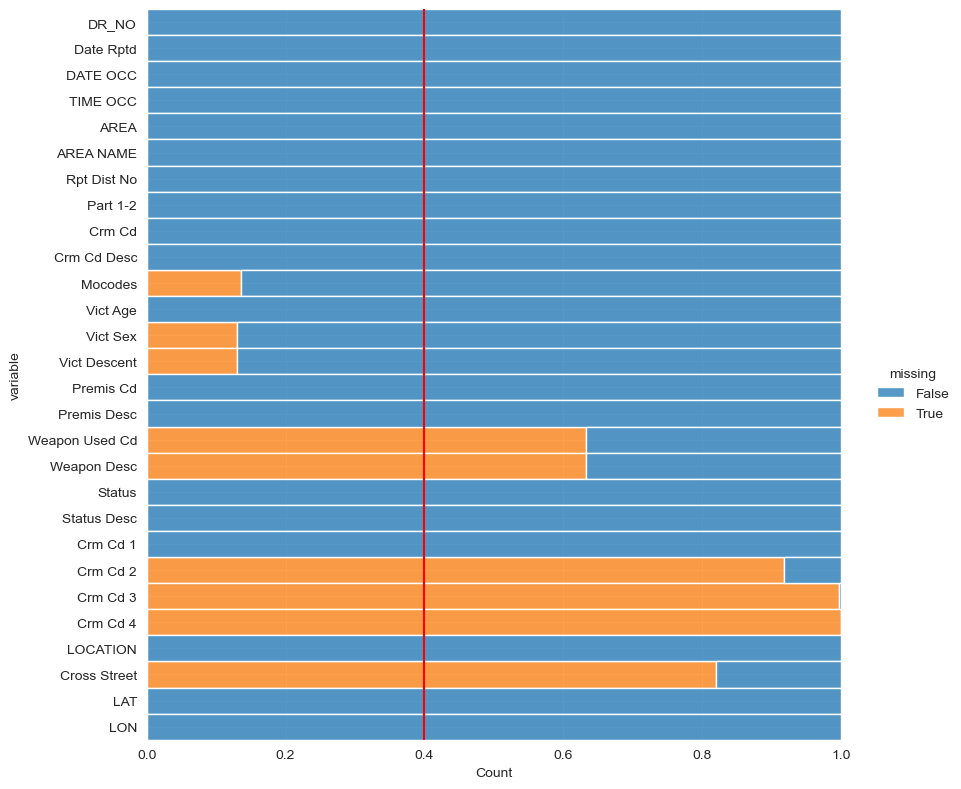

In [7]:
# plt.figure(figsize=(18,8))
df=dataset
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           317854 non-null  int64         
 1   Date Rptd       317854 non-null  object        
 2   DATE OCC        317854 non-null  datetime64[ns]
 3   TIME OCC        317854 non-null  int64         
 4   AREA            317854 non-null  int64         
 5   AREA NAME       317854 non-null  object        
 6   Rpt Dist No     317854 non-null  int64         
 7   Part 1-2        317854 non-null  int64         
 8   Crm Cd          317854 non-null  int64         
 9   Crm Cd Desc     317854 non-null  object        
 10  Mocodes         274531 non-null  object        
 11  Vict Age        317854 non-null  int64         
 12  Vict Sex        276448 non-null  object        
 13  Vict Descent    276443 non-null  object        
 14  Premis Cd       317849 non-null  flo

In [9]:
dataset.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64

In [10]:
dataset = dataset.drop(['Cross Street','Crm Cd 4','Crm Cd 3','Crm Cd 2','Weapon Desc','Vict Descent','Mocodes'],axis=1)

In [11]:
dataset.select_dtypes(exclude='object').isnull().sum()

DR_NO                  0
DATE OCC               0
TIME OCC               0
AREA                   0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Vict Age               0
Premis Cd              5
Weapon Used Cd    201377
Crm Cd 1               3
LAT                    0
LON                    0
dtype: int64

In [12]:
median_value = dataset['Crm Cd 1'].median()
dataset['Crm Cd 1'] = dataset['Crm Cd 1'].fillna(median_value)

In [13]:
dataset["Crm Cd"].unique()
dataset.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [14]:
dataset['WEEKDAY'] = dataset['DATE OCC'].dt.dayofweek.astype(str).copy()
dataset['HOUR'] = dataset['DATE OCC'].astype(str).str[11:13].copy()

In [15]:
dataset

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,WEEKDAY,HOUR
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,SINGLE FAMILY DWELLING,400.0,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2,
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,SIDEWALK,500.0,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2,
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,745.0,700 E 73RD ST,33.9739,-118.2630,2,
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2,
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,BEAUTY SUPPLY STORE,NaN,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317849,211208872,03/19/2021 12:00:00 AM,2021-03-19,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,PARKING LOT,NaN,IC,Invest Cont,510.0,58TH ST,33.9897,-118.2827,4,
317850,210506531,03/04/2021 12:00:00 AM,2021-03-04,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,AA,Adult Arrest,434.0,200 W 2ND ST,33.7424,-118.2814,3,
317851,211710505,07/09/2021 12:00:00 AM,2021-07-09,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,SINGLE FAMILY DWELLING,500.0,IC,Invest Cont,624.0,8800 DEMPSEY AV,34.2302,-118.4775,4,
317852,210312887,07/12/2021 12:00:00 AM,2021-07-12,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,STREET,NaN,IC,Invest Cont,350.0,CRENSHAW BL,34.0088,-118.3351,0,


In [16]:
dataset = dataset[dataset['Vict Sex'].notna()]

In [17]:
le = LabelEncoder()

In [18]:
dataset['Vict Sex'] = le.fit_transform(dataset['Vict Sex'])

/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_45409/907066800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vict Sex'] = le.fit_transform(dataset['Vict Sex'])


In [21]:
from sklearn.model_selection import train_test_split
x = dataset[['AREA', 'Vict Age','Vict Sex',"WEEKDAY", 'LAT',"LON","Weapon Used Cd" ]]
y= dataset["Crm Cd"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

In [22]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor().fit(x_train,y_train)
print('Training R_SQ:%.3f'% dec.score(x_train,y_train))

Training R_SQ:0.964


In [23]:
y_train_prd = dec.predict(x_train)

In [24]:
y_test_pred = dec.predict(x_test)
print('Training R_SQ:%.3f'% dec.score(x_test,y_test_pred))

Training R_SQ:1.000


In [25]:
print('r_sq:',r2_score(y_train,y_train_prd),
      'the MAE:',mean_absolute_error(y_train,y_train_prd),
      'the MsE:',mean_squared_error(y_train,y_train_prd),
      'The EVS:',explained_variance_score(y_train,y_train_prd))

r_sq: 0.9638074359932064 the MAE: 9.2018199855027 the MsE: 1829.0938875922877 The EVS: 0.9638074359932064


In [26]:
print('r_sq:',accuracy_score(y_test_pred,y_test),
      'the MAE:',mean_absolute_error(y_test,y_test_pred),
      'the MsE:',mean_squared_error(y_test,y_test_pred),
      'The EVS:',explained_variance_score(y_test,y_test_pred))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets